In [1]:
import pandas as pd # to read sql data into a pandas dataframe
import psycopg2 # to connect to SQL database
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import missingno as msno
import numpy as np


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_housing = pd.read_csv('./data/_SELECT_kchd_kchs_date_kchs_price_FROM_king_county_house_details_202412181411.csv')

In [14]:
df_housing.head(15)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,...,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,...,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,...,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000


In [4]:
df_housing.yr_renovated.unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [ ]:
# remove the last zero attached to the rennovation years

In [5]:
df_housing.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [6]:
df_housing.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

In [7]:
df_housing['date'] = pd.to_datetime(df_housing['date'], format='mixed')

In [8]:
type(df_housing['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df_housing['waterfront'].unique()

array([nan,  0.,  1.])

In [10]:
df_housing.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512,540296.574
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00,7700000.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140


In [12]:
dfgs = df_housing.groupby('waterfront')
print(dfgs.describe())

                  id                                              \
               count           mean           min            25%   
waterfront                                                         
0.000      19060.000 4594695538.188   1200021.000 2124079072.250   
1.000        146.000 4454968693.048 121029034.000 2016368797.000   

                                                                        \
                      50%            75%            max            std   
waterfront                                                               
0.000      3905081665.000 7334500882.500 9900000190.000 2877507911.085   
1.000      3692779634.000 7390450150.000 9808700762.000 2858044756.510   

            bedrooms        ...                 date          price  \
               count  mean  ...                  max  std     count   
waterfront                  ...                                       
0.000      19060.000 3.375  ...  2015-05-27 00:00:00  NaN 19060.000   
1.00

<Axes: >

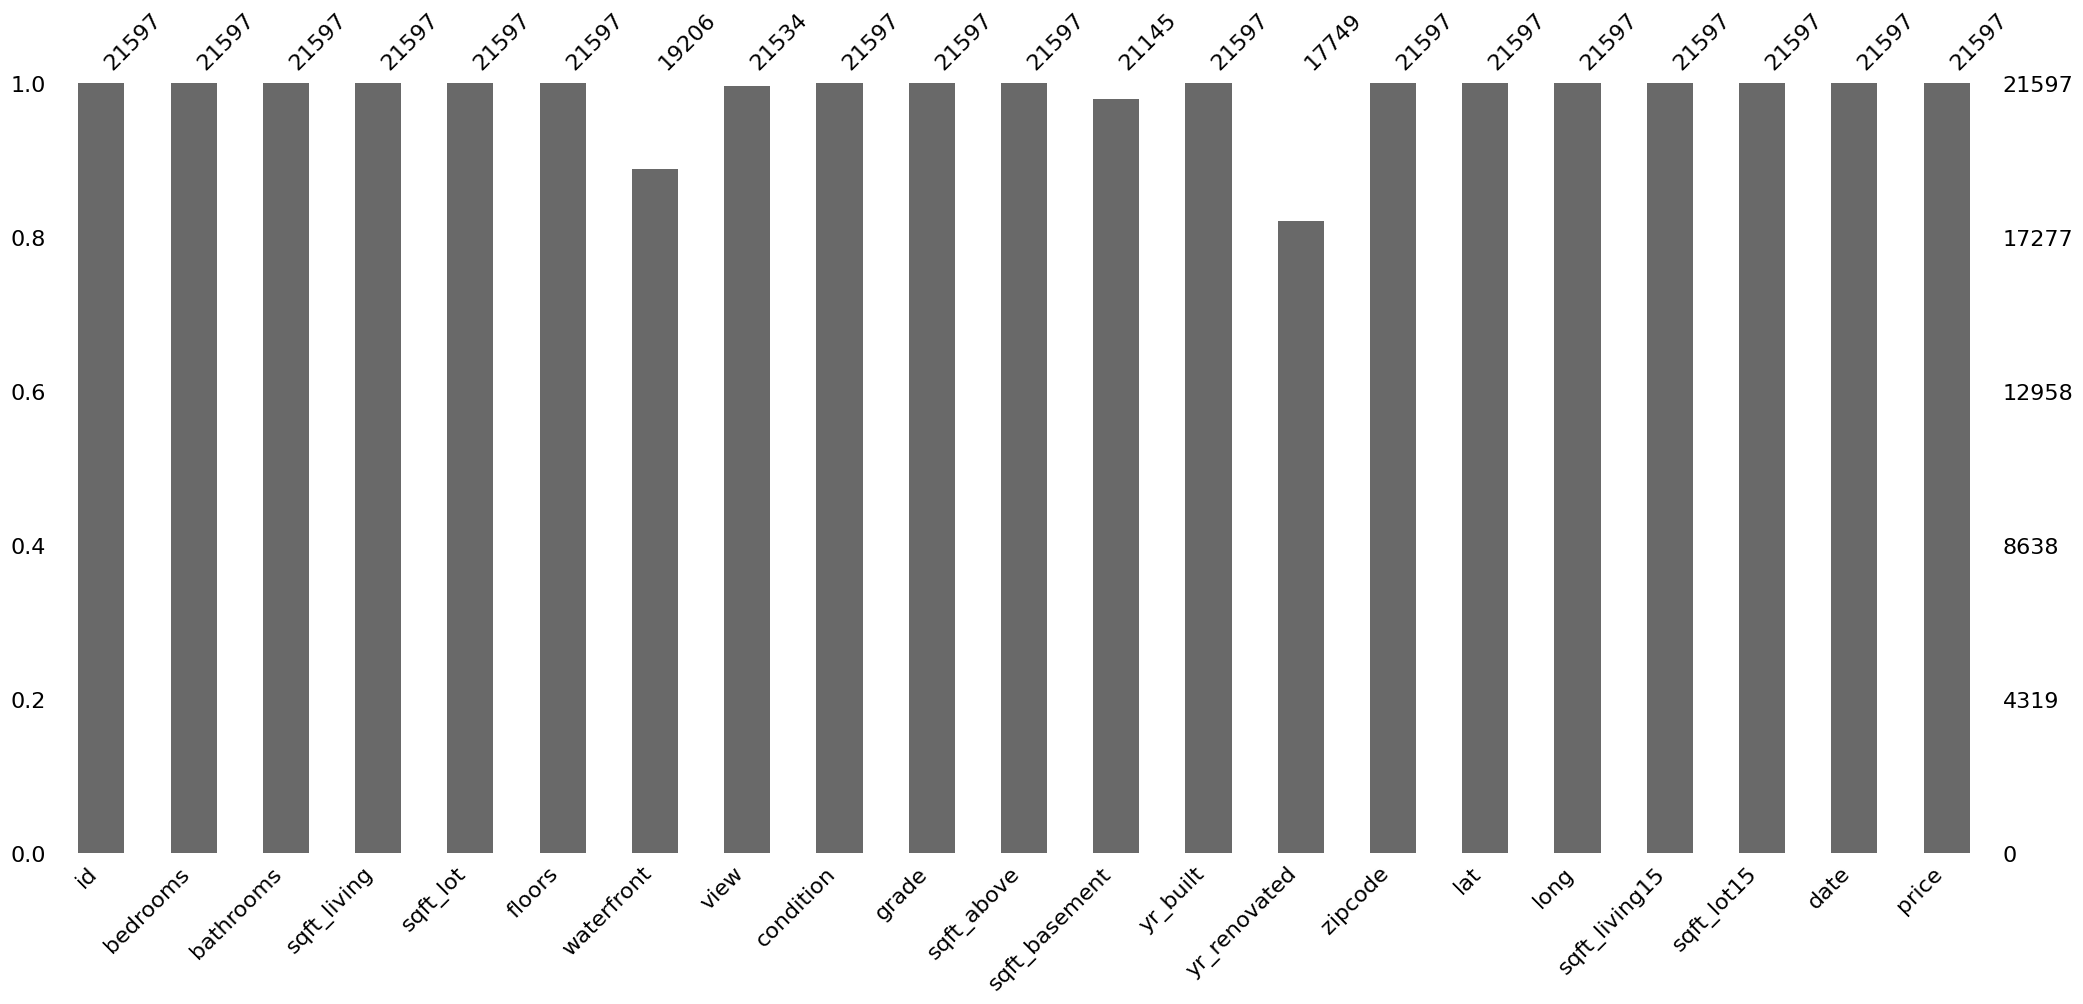

In [13]:
#show visually the missing values
msno.bar(df_housing)

<Axes: >

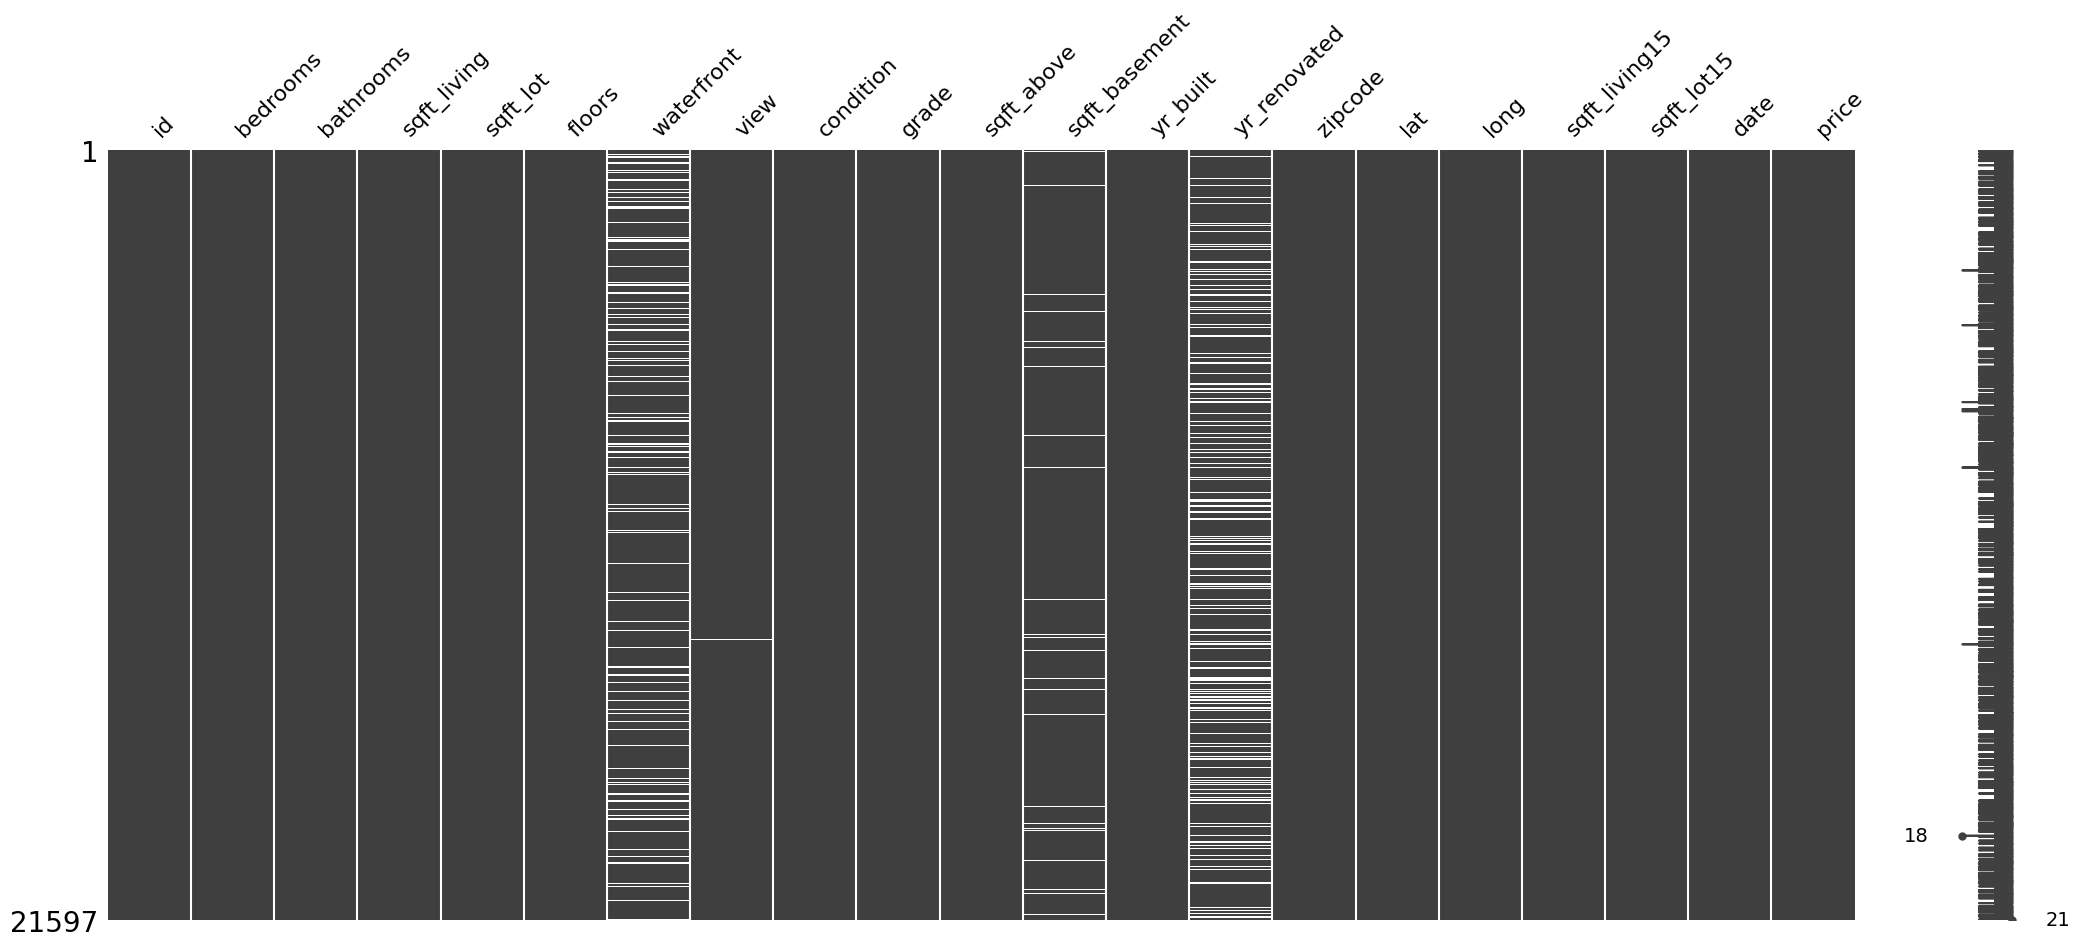

In [15]:
# try to figure out whether there is a pattern regarding the missing values.
# there does not appear to be any substantial correlation between properties that 
# lack a waterfront value and properties that lack a renovation value.
msno.matrix(df_housing)

In [ ]:
# a histogram to test if waterfront views are more lucrative than non-waterfront views
#